In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [28]:
def plot_and_show_statistics_compare(filename1, filename2, bin_count, x_max):
    # CSV 파일 읽기
    data1 = pd.read_csv(filename1)
    data2 = pd.read_csv(filename2)
    
    # 통계적 수치 계산
    allocation_rate_stats1 = data1['Allocation Rate'].describe()
    utilization_rate_stats1 = data1['Utilization Rate'].describe()
    allocation_rate_stats2 = data2['Allocation Rate'].describe()
    utilization_rate_stats2 = data2['Utilization Rate'].describe()
    
    print("Normal - Allocation Rate Statistics:")
    print(allocation_rate_stats1)
    print("\nNormal - Utilization Rate Statistics:")
    print(utilization_rate_stats1)
    
    print("\nOptimized - Allocation Rate Statistics:")
    print(allocation_rate_stats2)
    print("\nOptimized - Utilization Rate Statistics:")
    print(utilization_rate_stats2)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    # Allocation Rate KDE만 그리기 및 x축 최대값 설정
    sns.kdeplot(data1['Allocation Rate'], ax=axs[0, 0], color='blue', label='Normal')
    sns.kdeplot(data2['Allocation Rate'], ax=axs[0, 0], color='orange', label='Optimized')
    axs[0, 0].set_title('Allocation Rate KDE')
    axs[0, 0].set_xlim(0, 100)  # x축 최대값 고정
    axs[0, 0].legend()
    
    # Utilization Rate KDE만 그리기 및 x축 최대값 설정
    sns.kdeplot(data1['Utilization Rate'], ax=axs[0, 1], color='green', label='Normal')
    sns.kdeplot(data2['Utilization Rate'], ax=axs[0, 1], color='purple', label='Optimized')
    axs[0, 1].set_title('Utilization Rate KDE')
    axs[0, 1].set_xlim(0, 100)  # x축 최대값 고정
    axs[0, 1].legend()
    
    # 기존 하단 서브플롯 삭제
    for j in range(2):
        fig.delaxes(axs[1, j])
    
    # 새로운 하단 서브플롯 추가
    ax_combined = fig.add_subplot(212)  # 하단 전체를 차지하도록 설정
    
    # Allocation Rate 스무스 곡선
    x_allocation1 = np.arange(len(data1))
    y_allocation1 = data1['Allocation Rate']
    x_new_allocation1 = np.linspace(x_allocation1.min(), x_allocation1.max(), 300)
    spl_allocation1 = make_interp_spline(x_allocation1, y_allocation1, k=3)
    y_smooth_allocation1 = spl_allocation1(x_new_allocation1)
    
    x_allocation2 = np.arange(len(data2))
    y_allocation2 = data2['Allocation Rate']
    x_new_allocation2 = np.linspace(x_allocation2.min(), x_allocation2.max(), 300)
    spl_allocation2 = make_interp_spline(x_allocation2, y_allocation2, k=3)
    y_smooth_allocation2 = spl_allocation2(x_new_allocation2)
    
    # Utilization Rate 스무스 곡선
    x_utilization1 = np.arange(len(data1))
    y_utilization1 = data1['Utilization Rate']
    x_new_utilization1 = np.linspace(x_utilization1.min(), x_utilization1.max(), 300)
    spl_utilization1 = make_interp_spline(x_utilization1, y_utilization1, k=3)
    y_smooth_utilization1 = spl_utilization1(x_new_utilization1)
    
    x_utilization2 = np.arange(len(data2))
    y_utilization2 = data2['Utilization Rate']
    x_new_utilization2 = np.linspace(x_utilization2.min(), x_utilization2.max(), 300)
    spl_utilization2 = make_interp_spline(x_utilization2, y_utilization2, k=3)
    y_smooth_utilization2 = spl_utilization2(x_new_utilization2)
    
    # 두 파일의 Allocation Rate 및 Utilization Rate 곡선 그리기
    ax_combined.plot(x_new_allocation1, y_smooth_allocation1, color='green', label='Normal - Allocation Rate')
    ax_combined.plot(x_new_utilization1, y_smooth_utilization1, color='black', label='Normal - Utilization Rate')
    ax_combined.plot(x_new_allocation2, y_smooth_allocation2, color='blue', linestyle='--', label='Optimized - Allocation Rate')
    ax_combined.plot(x_new_utilization2, y_smooth_utilization2, color='red', linestyle='--', label='Optimized - Utilization Rate')
    
    # x축 최대값 적용
    ax_combined.set_xlim(0, x_max)
    ax_combined.set_title('Allocation Rate and Utilization Rate Over Time')
    ax_combined.set_xlabel('Index')
    ax_combined.set_ylabel('Rate')
    ax_combined.legend()
    
    # 그래프 제목 설정
    base_filename1 = os.path.splitext(os.path.basename(filename1))[0]
    base_filename2 = os.path.splitext(os.path.basename(filename2))[0]
    fig.suptitle(f'{base_filename1} vs {base_filename2}', fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
    
    # 그래프를 png 파일로 저장
    png_filename = f"{base_filename1}_vs_{base_filename2}.png"
    plt.savefig(png_filename)
    plt.show()


In [23]:
def plot_and_show_statistics_(filename, bin_count, x_max):
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    #sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    sns.kdeplot(data['Allocation Rate'], ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Allocation Rate Distribution')
    axs[0, 0].set_xlim(0, 100)
    
    # Utilization Rate 히스토그램 및 KDE 그리기
    #sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    sns.kdeplot(data['Utilization Rate'], ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Utilization Rate Distribution')
    axs[0, 1].set_xlim(0, 100)
    
# 기존 하단 서브플롯 삭제
    for j in range(2):
        fig.delaxes(axs[1, j])
    
    # 새로운 하단 서브플롯 추가
    ax_combined = fig.add_subplot(212)  # 하단 전체를 차지하도록 설정
    
    x_allocation = np.arange(len(data))
    y_allocation = data['Allocation Rate']
    x_new_allocation = np.linspace(x_allocation.min(), x_allocation.max(), 300)
    spl_allocation = make_interp_spline(x_allocation, y_allocation, k=3)
    y_smooth_allocation = spl_allocation(x_new_allocation)
    
    x_utilization = np.arange(len(data))
    y_utilization = data['Utilization Rate']
    x_new_utilization = np.linspace(x_utilization.min(), x_utilization.max(), 300)
    spl_utilization = make_interp_spline(x_utilization, y_utilization, k=3)
    y_smooth_utilization = spl_utilization(x_new_utilization)
    
    ax_combined.plot(x_new_allocation, y_smooth_allocation, color='green', label='Allocation Rate')
    ax_combined.plot(x_new_utilization, y_smooth_utilization, color='black', label='Utilization Rate')

    ax_combined.set_xlim(0, x_max)
    ax_combined.set_title('Allocation Rate and Utilization Rate Over Time')
    ax_combined.set_xlabel('Index')
    ax_combined.set_ylabel('Rate')
    ax_combined.legend()

    
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"
        # 전체 제목 설정
    fig.suptitle(base_filename, fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
    

    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()

Normal - Allocation Rate Statistics:
count    237720.000000
mean         75.541755
std          15.589122
min           9.523810
25%          72.619000
50%          78.571400
75%          84.523800
max          97.619000
Name: Allocation Rate, dtype: float64

Normal - Utilization Rate Statistics:
count    237720.000000
mean         30.586813
std          11.525356
min           6.423200
25%          21.258800
50%          29.961800
75%          40.488800
max          66.758900
Name: Utilization Rate, dtype: float64

Optimized - Allocation Rate Statistics:
count    219019.000000
mean         81.991912
std          21.377952
min           9.523810
25%          86.904800
50%          91.666700
75%          94.047600
max          98.809500
Name: Allocation Rate, dtype: float64

Optimized - Utilization Rate Statistics:
count    219019.000000
mean         32.378264
std          11.536998
min           6.423200
25%          25.161900
50%          31.286000
75%          41.707800
max          

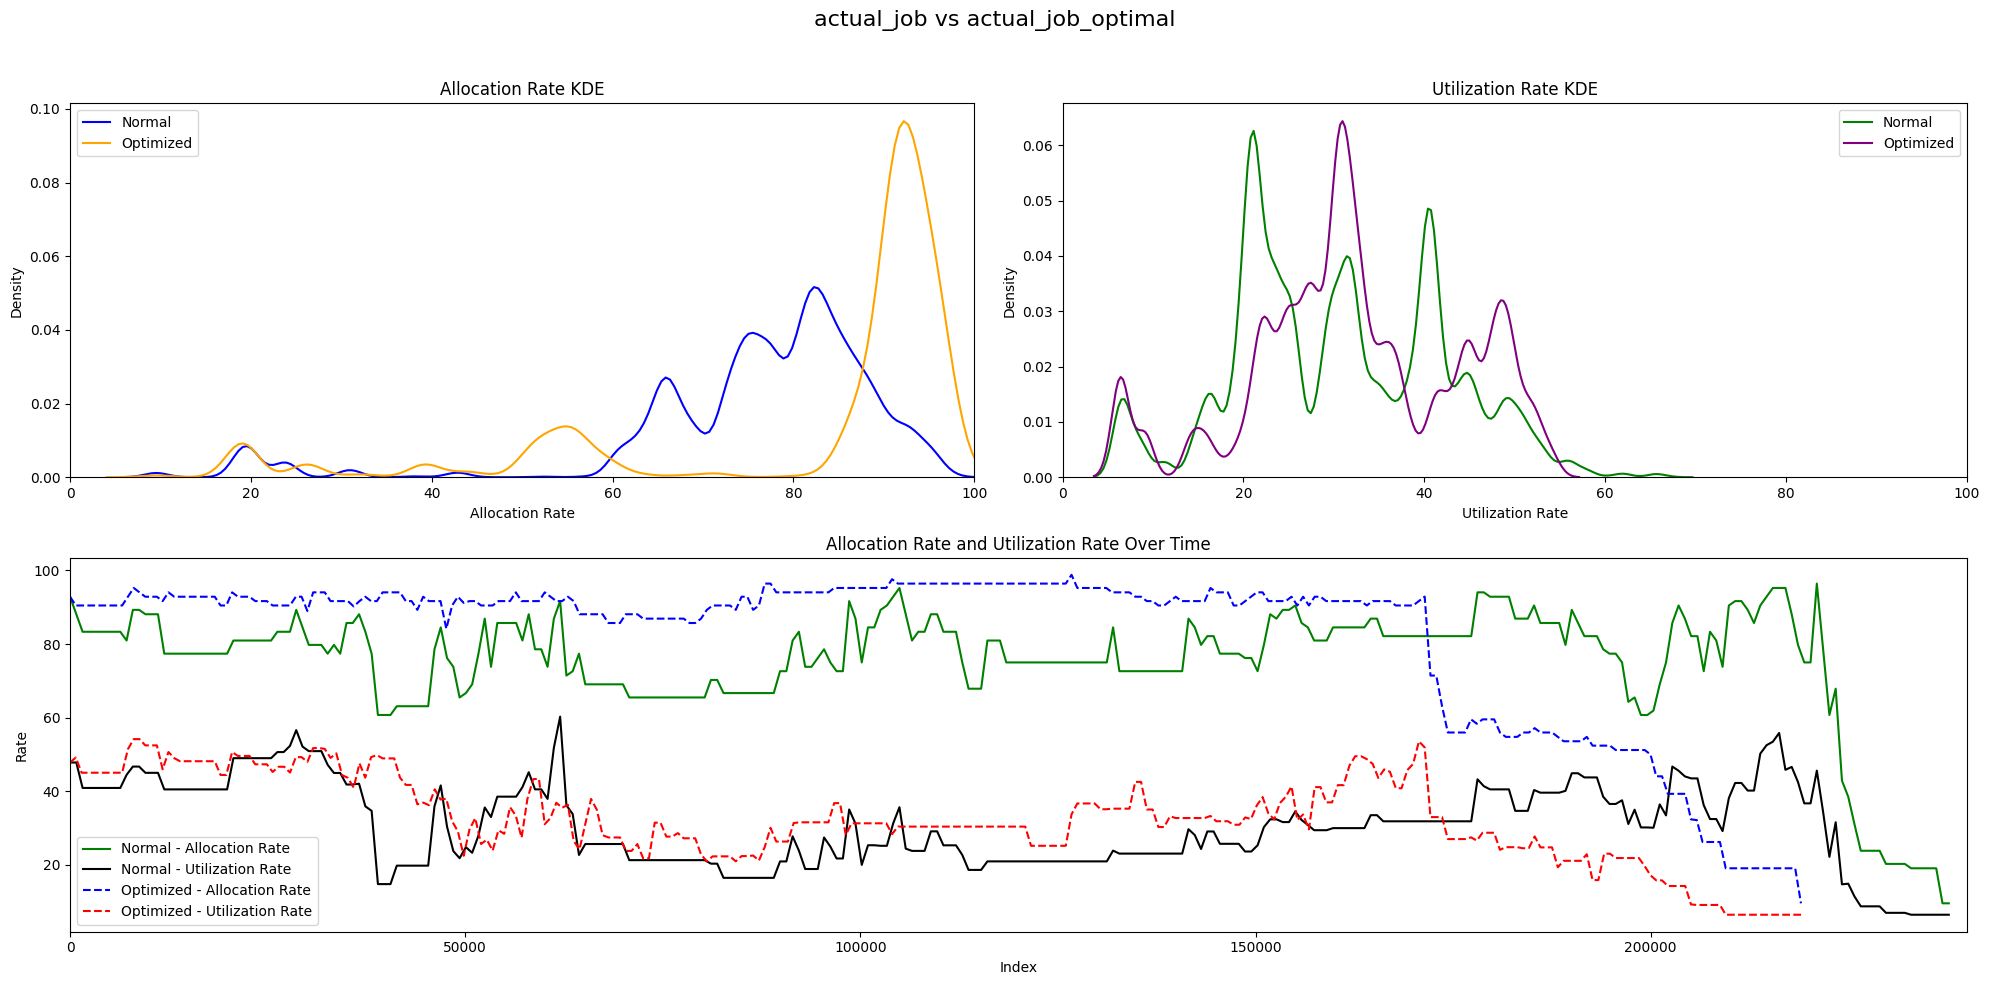

In [29]:
plot_and_show_statistics_compare("actual_job.result", "actual_job_optimal.result", 100, 240000)

Allocation Rate Statistics:
count    237720.000000
mean         75.541755
std          15.589122
min           9.523810
25%          72.619000
50%          78.571400
75%          84.523800
max          97.619000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    237720.000000
mean         30.586813
std          11.525356
min           6.423200
25%          21.258800
50%          29.961800
75%          40.488800
max          66.758900
Name: Utilization Rate, dtype: float64


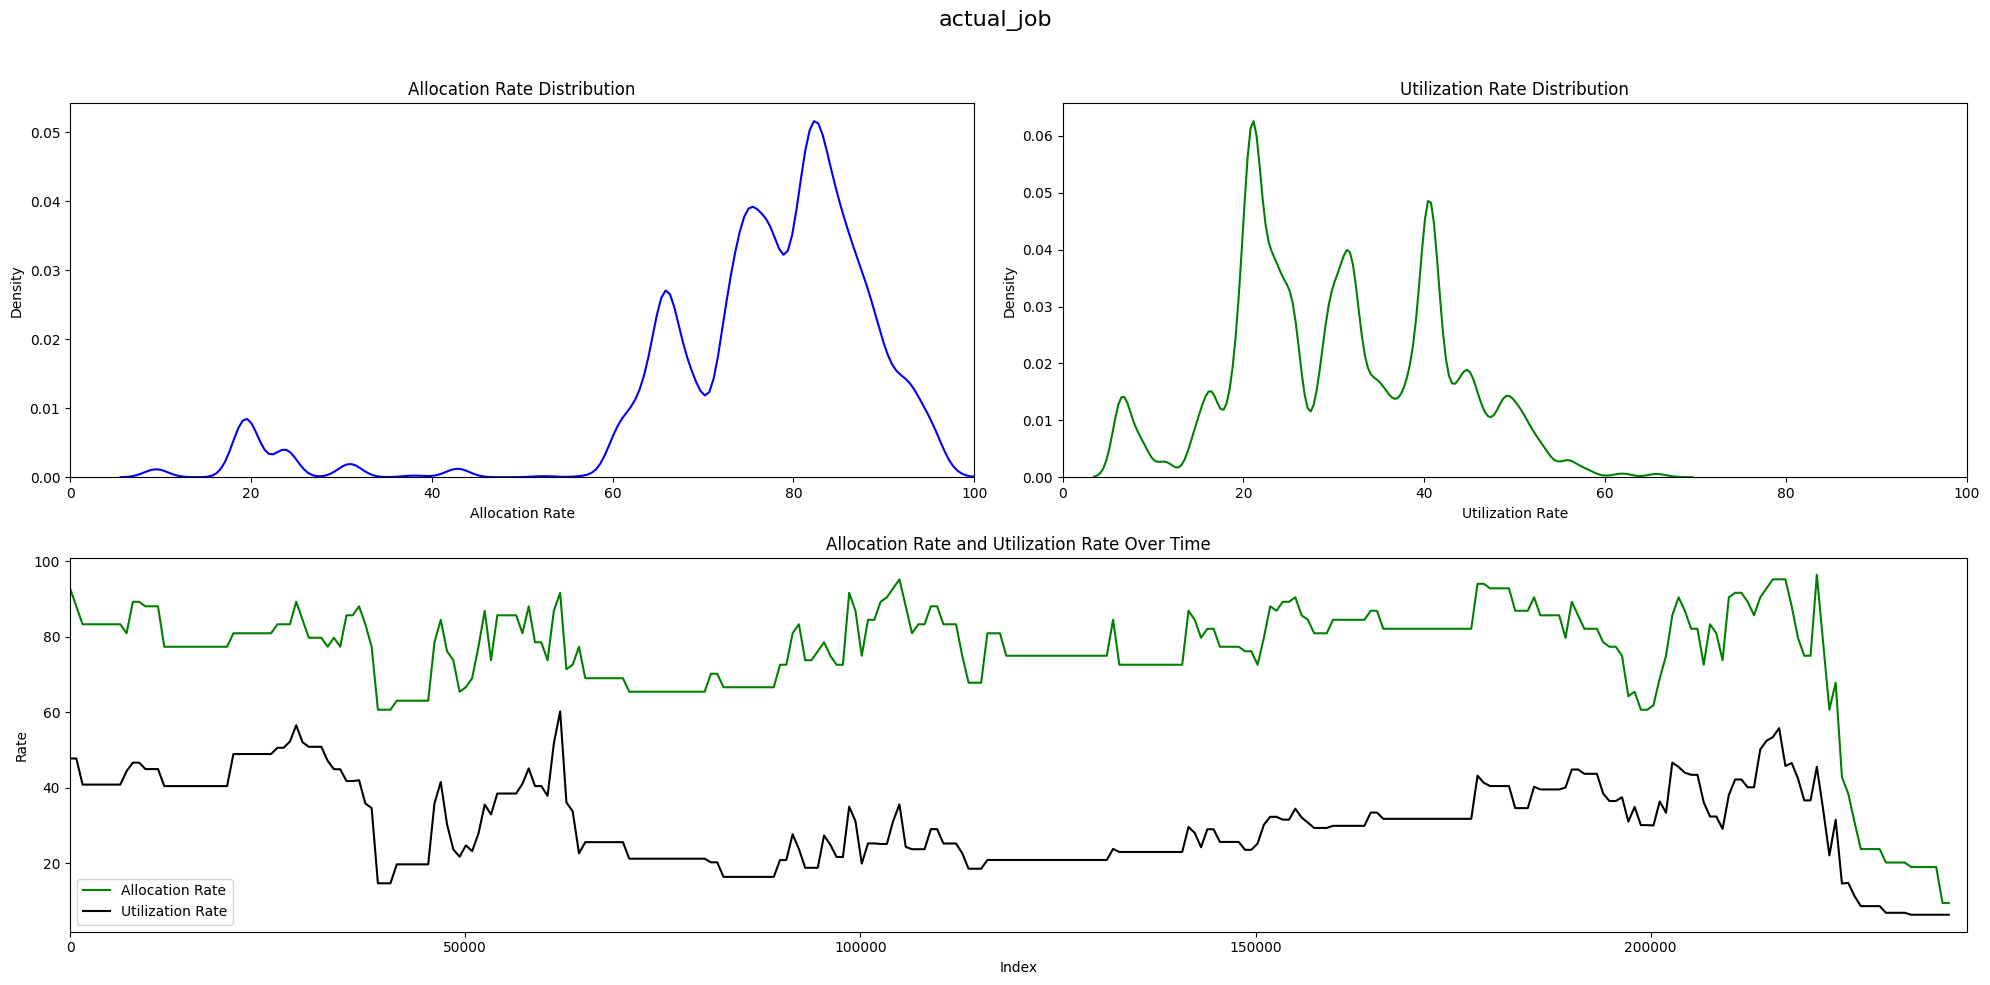

In [24]:
plot_and_show_statistics_("actual_job.result", 100, 240000)

Allocation Rate Statistics:
count    219019.000000
mean         81.991912
std          21.377952
min           9.523810
25%          86.904800
50%          91.666700
75%          94.047600
max          98.809500
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    219019.000000
mean         32.378264
std          11.536998
min           6.423200
25%          25.161900
50%          31.286000
75%          41.707800
max          54.156600
Name: Utilization Rate, dtype: float64


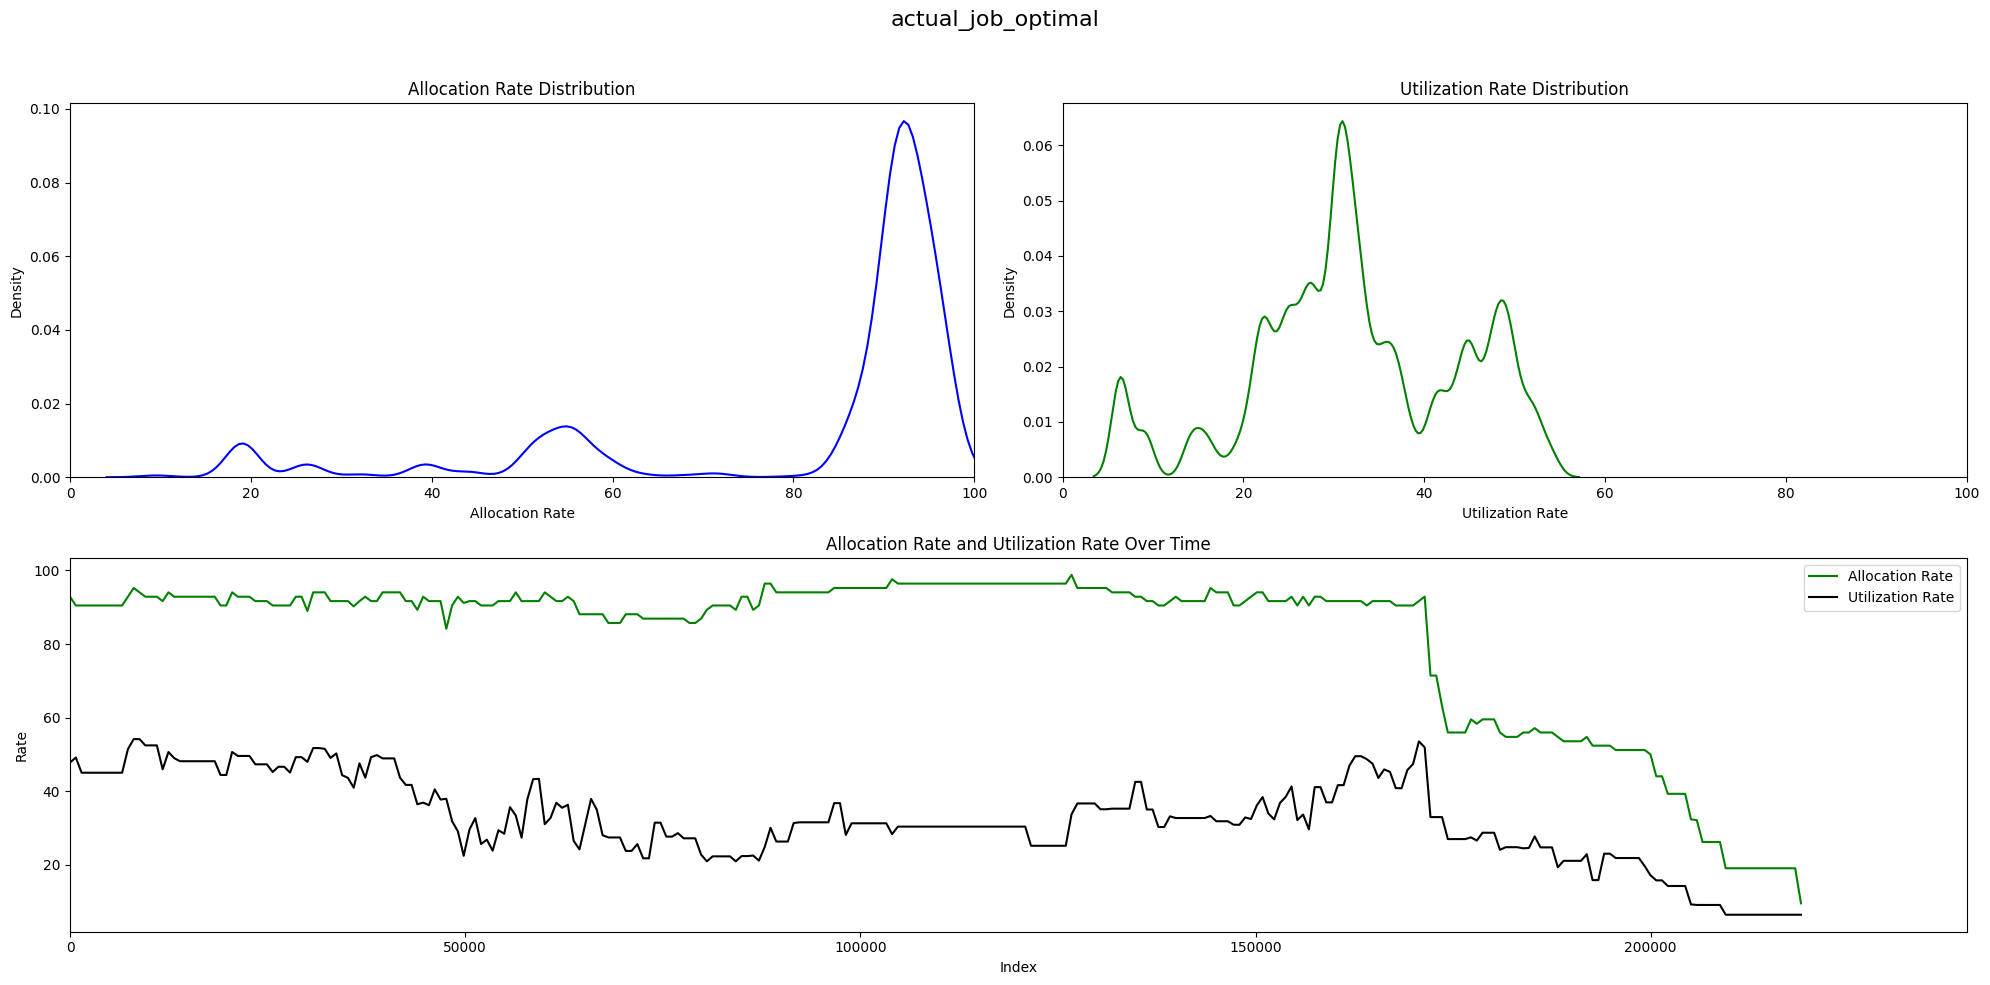

In [25]:
plot_and_show_statistics_("actual_job_optimal.result", 100, 240000)

Normal - Allocation Rate Statistics:
count    2.228040e+06
mean     6.995303e+01
std      1.252856e+01
min      9.523810e+00
25%      6.428570e+01
50%      7.142860e+01
75%      7.738100e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Normal - Utilization Rate Statistics:
count    2.228040e+06
mean     2.944249e+01
std      1.080421e+01
min      1.617670e+00
25%      2.282260e+01
50%      2.824780e+01
75%      3.640940e+01
max      6.468000e+01
Name: Utilization Rate, dtype: float64

Optimized - Allocation Rate Statistics:
count    2.108646e+06
mean     7.391385e+01
std      1.588907e+01
min      5.952380e+00
25%      6.666670e+01
50%      7.500000e+01
75%      8.452380e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Optimized - Utilization Rate Statistics:
count    2.108646e+06
mean     3.094486e+01
std      1.194653e+01
min      0.000000e+00
25%      2.369610e+01
50%      3.034920e+01
75%      3.733580e+01
max      6.762000e+01
Name: Utilization Rate

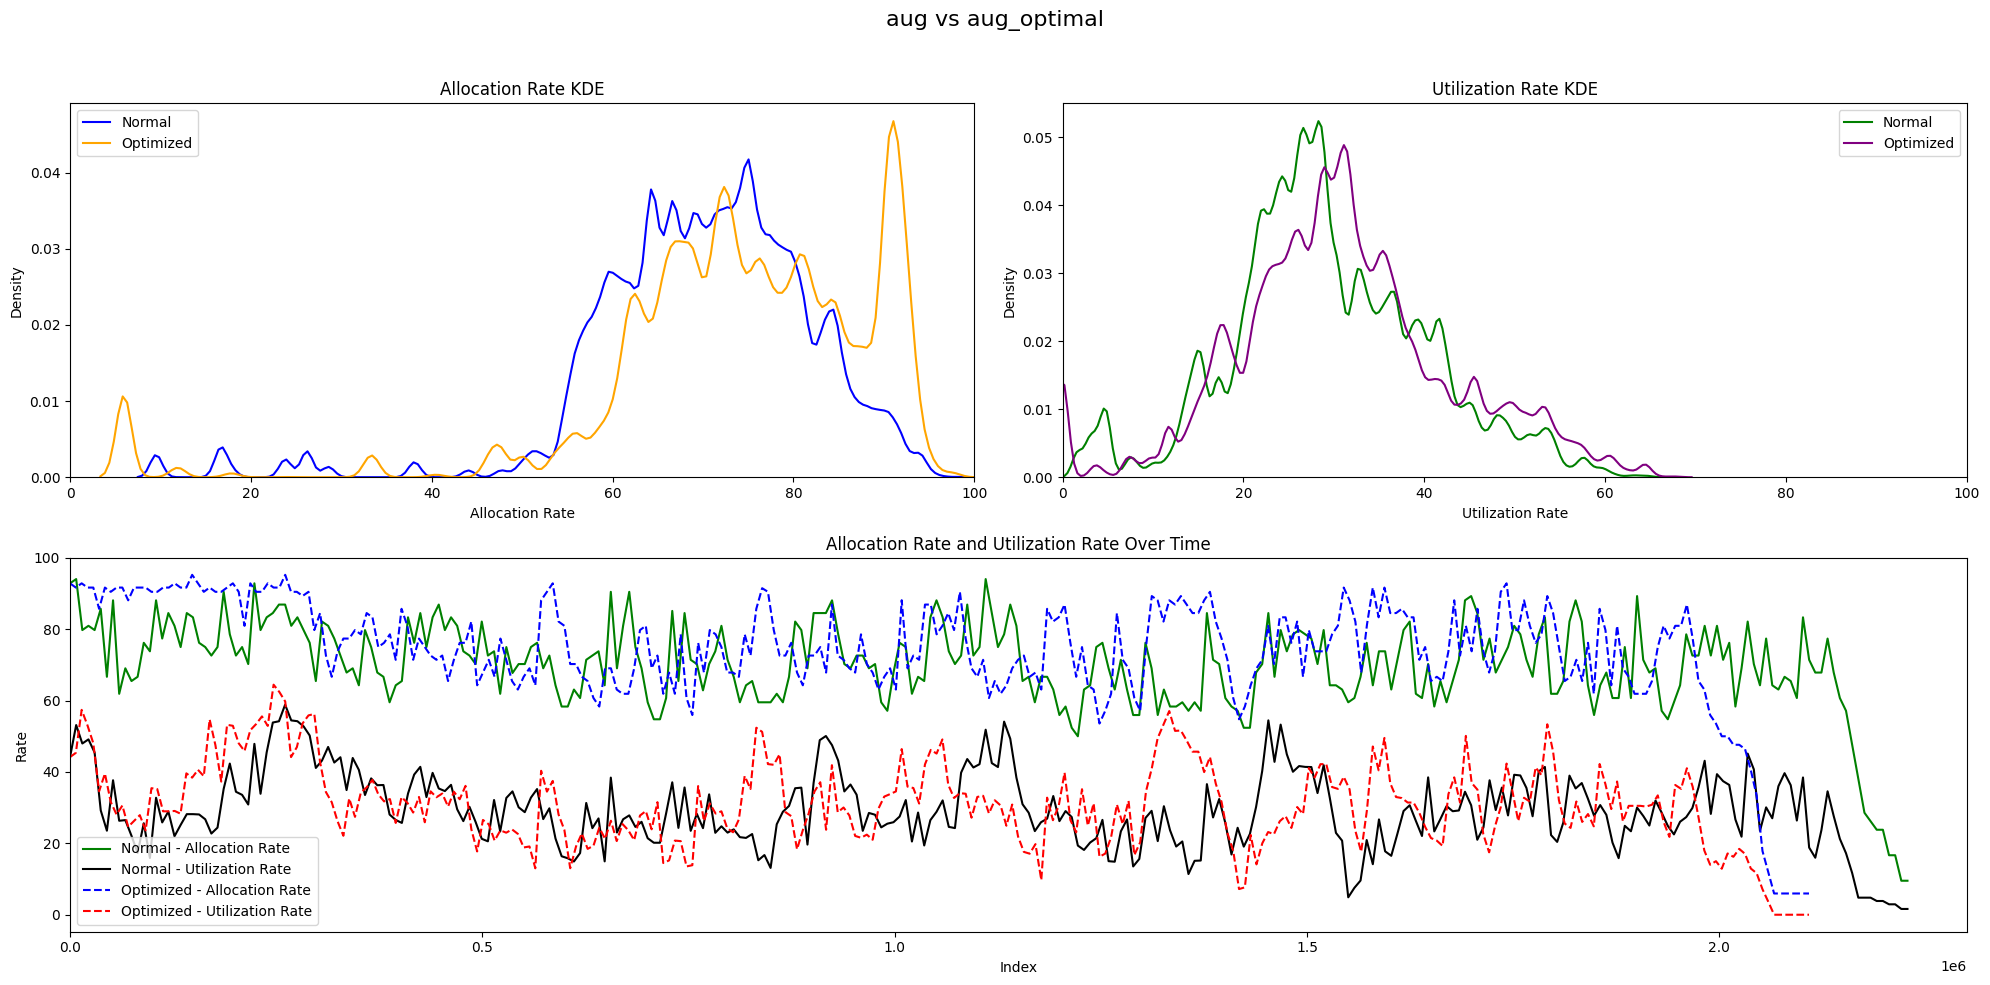

In [31]:
plot_and_show_statistics_compare("aug.result", "aug_optimal.result", 100, 2300000)

Allocation Rate Statistics:
count    2.228040e+06
mean     6.995303e+01
std      1.252856e+01
min      9.523810e+00
25%      6.428570e+01
50%      7.142860e+01
75%      7.738100e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    2.228040e+06
mean     2.944249e+01
std      1.080421e+01
min      1.617670e+00
25%      2.282260e+01
50%      2.824780e+01
75%      3.640940e+01
max      6.468000e+01
Name: Utilization Rate, dtype: float64


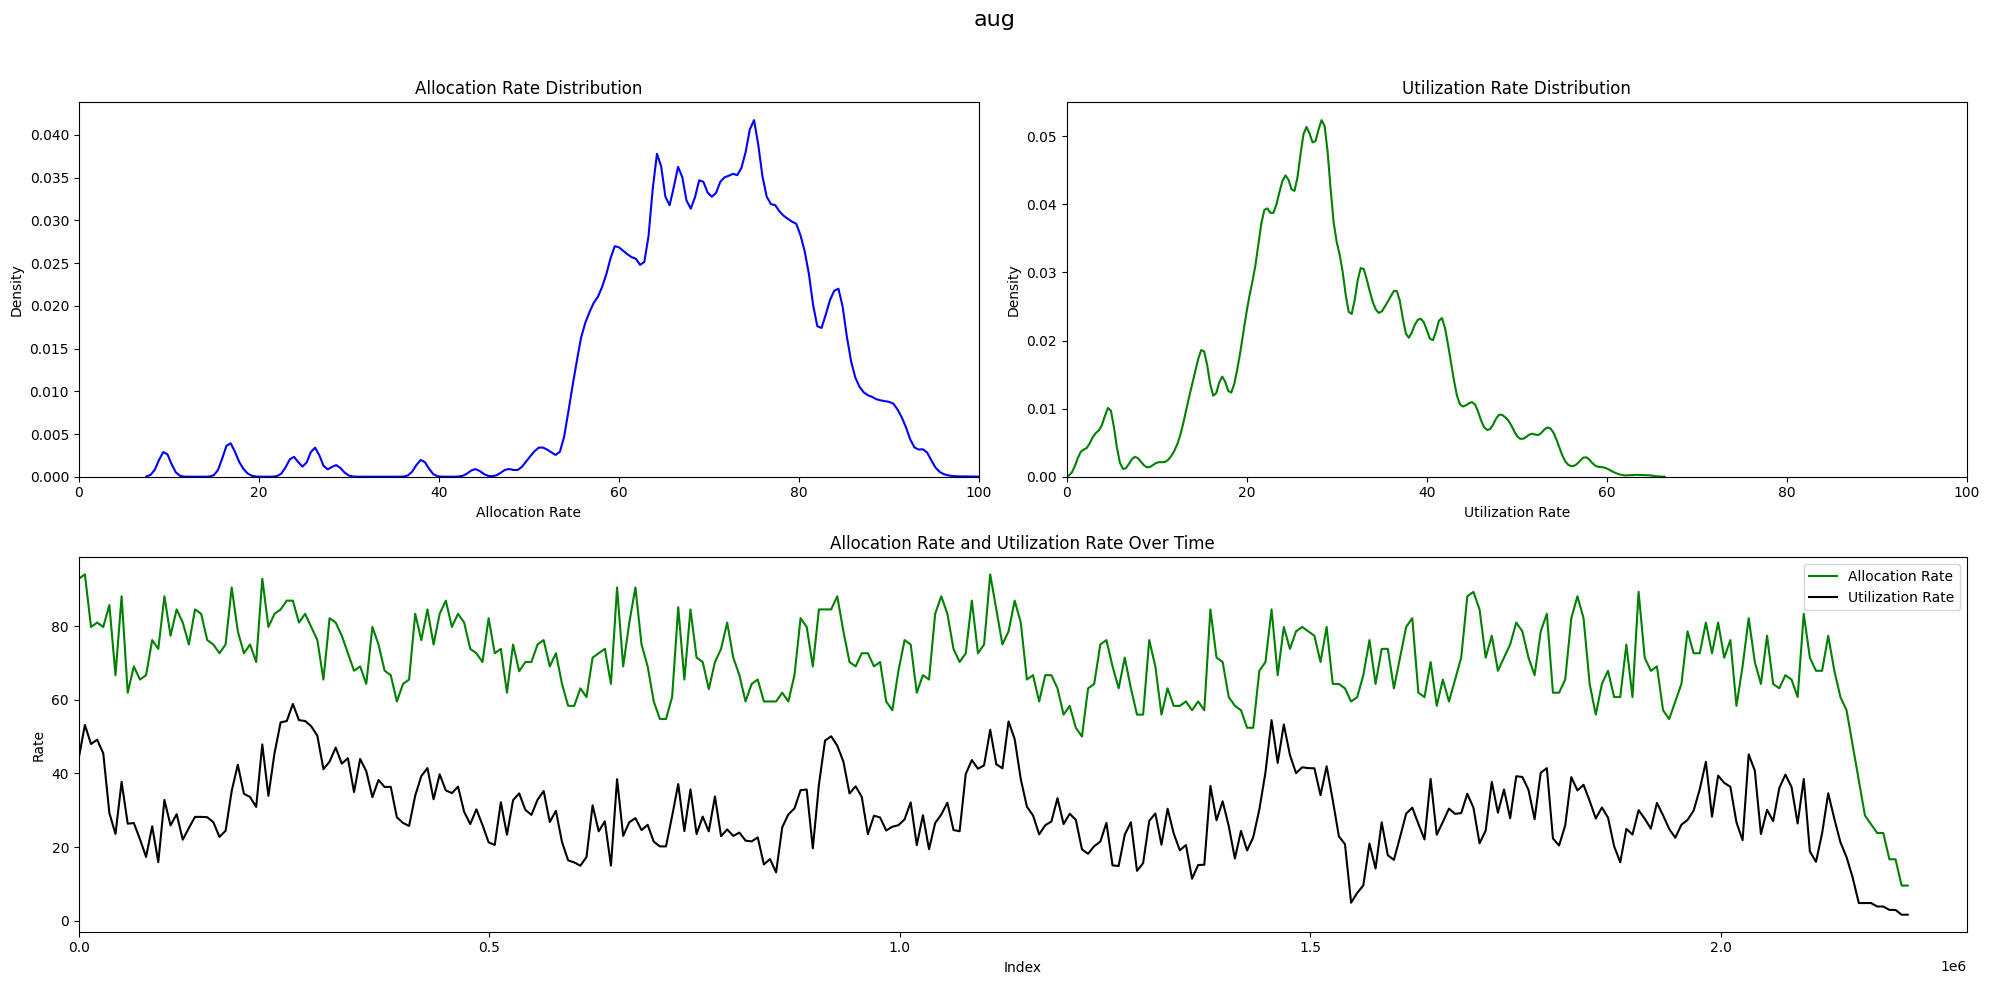

In [26]:
plot_and_show_statistics_("aug.result", 100, 2300000)

Allocation Rate Statistics:
count    2.108646e+06
mean     7.391385e+01
std      1.588907e+01
min      5.952380e+00
25%      6.666670e+01
50%      7.500000e+01
75%      8.452380e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    2.108646e+06
mean     3.094486e+01
std      1.194653e+01
min      0.000000e+00
25%      2.369610e+01
50%      3.034920e+01
75%      3.733580e+01
max      6.762000e+01
Name: Utilization Rate, dtype: float64


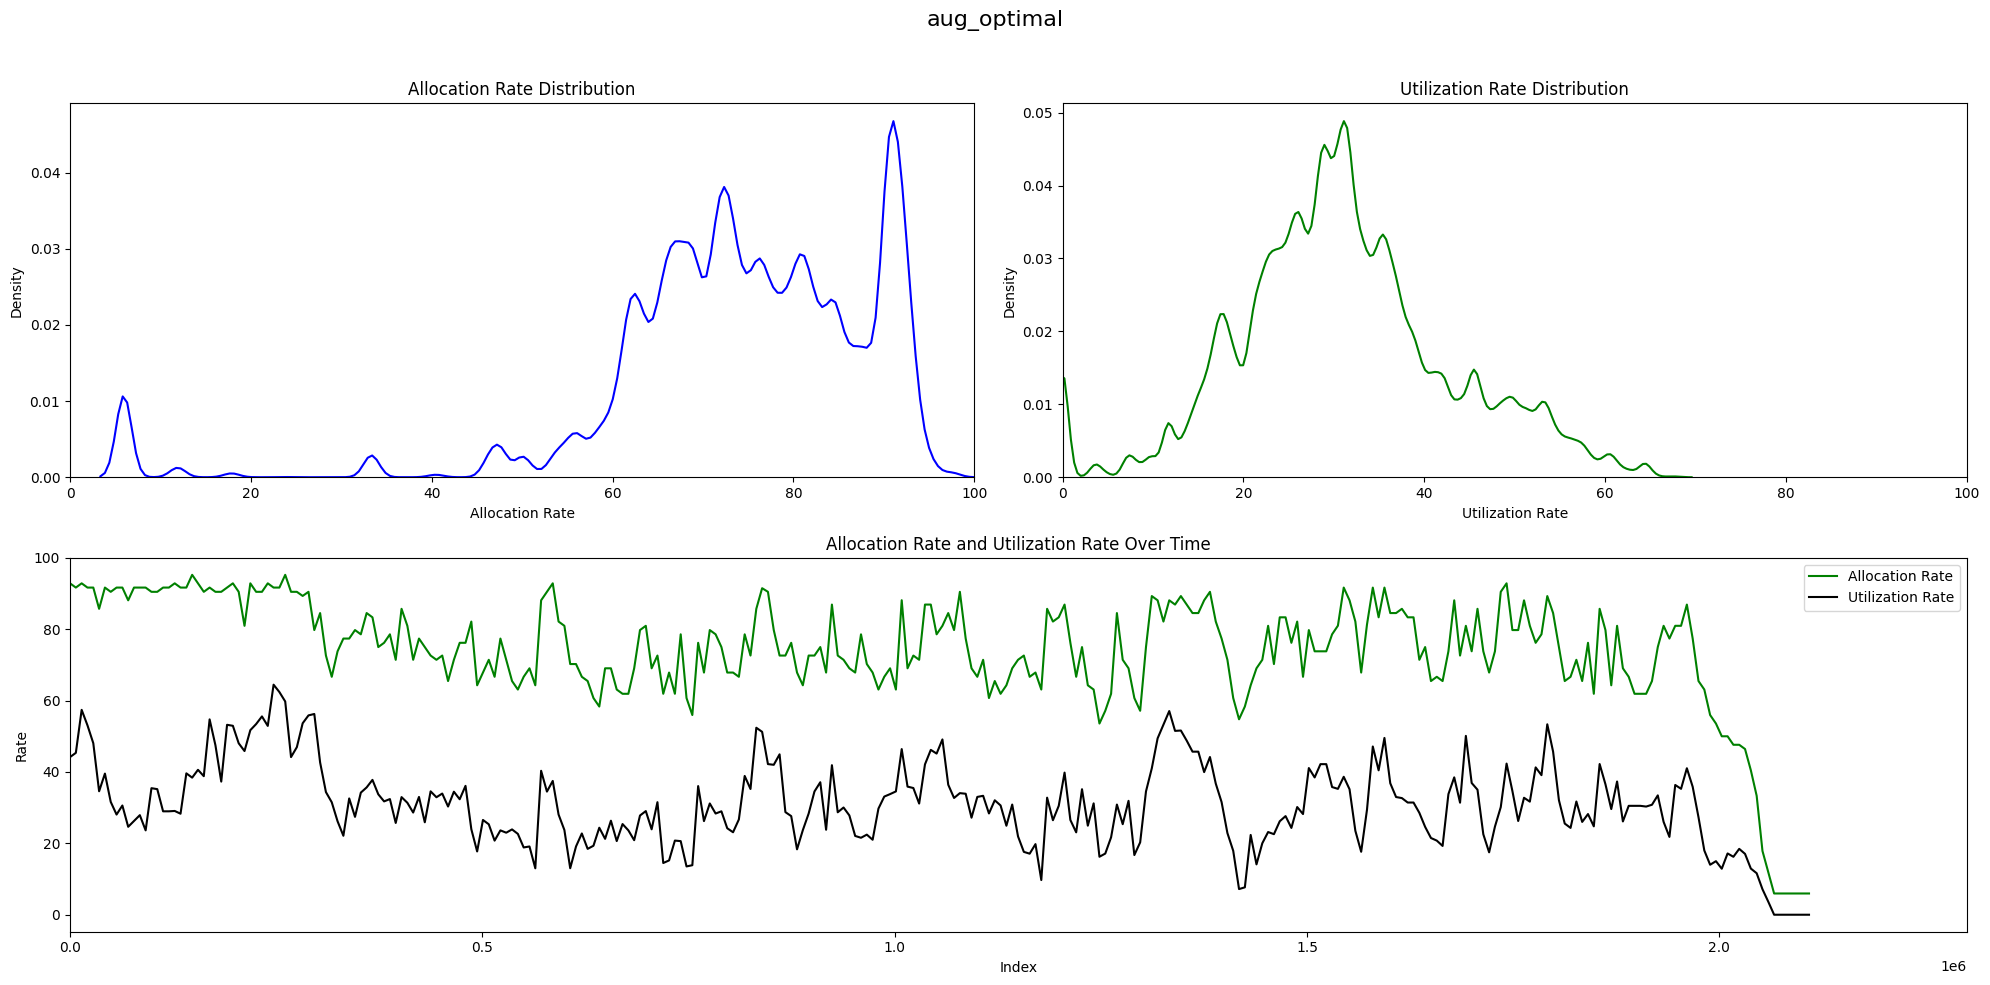

In [27]:
plot_and_show_statistics_("aug_optimal.result", 100, 2300000)